# Further Analysis and Final Remarks

Importing the libraries and the dataset.

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import math


notebook = 'Further Analysis and Final Remarks.ipnyb'
path = os.path.dirname(os.path.abspath(notebook))+'/data/'
X_train_path = path+'X_train_resampled.csv'
y_train_path = path+'y_train_resampled.csv'
test_path = path+'test.csv'

X_train = pd.read_csv(X_train_path)
y_train = pd.read_csv(y_train_path)
test = pd.read_csv(test_path)
X_test = test.loc[:,~test.columns.isin(['target'])]
y_test = test['target']

Fisrt let's verify the tax non filer status observation in the feature importance.

In [2]:
index = X_train.loc[X_train.loc[:,'tax filer status_ Nonfiler']==1].index.to_list()

In [3]:
y_train.loc[index].value_counts(normalize=True)

target
0         0.995737
1         0.004263
dtype: float64

99.6% of the nonfilers (sidenote this observation is being made on the augmented data not the actual data, but it is the data used by the model, thus its use) have incomes below $50k which relates to the non filling requirement.

With this observation, the importance it assumes in the model seems realistic.

As a final exploration we will retrain the model with the sub set of features selected by the recursive feature elimination.

In [4]:
rfe_features = ['age',
 'wage per hour',
 'capital gains',
 'dividends from stocks',
 'weeks worked in year',
 'class of worker_ Local government',
 'class of worker_ Not in universe',
 'class of worker_ Private',
 'class of worker_ Self-employed-incorporated',
 'class of worker_ State government',
 'class of worker_ Without pay',
 'education_ 11th grade',
 'education_ 12th grade no diploma',
 'education_ 1st 2nd 3rd or 4th grade',
 'education_ 5th or 6th grade',
 'education_ 7th and 8th grade',
 'education_ 9th grade',
 'education_ Associates degree-academic program',
 'education_ Associates degree-occup /vocational',
 'education_ Bachelors degree(BA AB BS)',
 'education_ High school graduate',
 'education_ Less than 1st grade',
 'education_ Some college but no degree',
 'marital stat_ Never married',
 'major industry code_ Business and repair services',
 'major industry code_ Education',
 'major industry code_ Medical except hospital',
 'major industry code_ Not in universe or children',
 'major industry code_ Personal services except private HH',
 'major industry code_ Private household services',
 'major industry code_ Retail trade',
 'major industry code_ Social services',
 'major industry code_ Transportation',
 'major occupation code_ Executive admin and managerial',
 'major occupation code_ Farming forestry and fishing',
 'major occupation code_ Handlers equip cleaners etc ',
 'major occupation code_ Machine operators assmblrs & inspctrs',
 'major occupation code_ Other service',
 'major occupation code_ Precision production craft & repair',
 'major occupation code_ Private household services',
 'major occupation code_ Professional specialty',
 'major occupation code_ Transportation and material moving',
 'race_ Black',
 'hispanic origin_ Central or South American',
 'hispanic origin_ Mexican (Mexicano)',
 'hispanic origin_ Mexican-American',
 'hispanic origin_ Other Spanish',
 'sex_ Male',
 'reason for unemployment_ Re-entrant',
 'tax filer status_ Joint both under 65',
 'tax filer status_ Joint one under 65 & one 65+',
 'tax filer status_ Nonfiler',
 'region of previous residence_ Midwest',
 'region of previous residence_ South',
 'detailed household summary in household_ Householder',
 'detailed household summary in household_ Nonrelative of householder',
 'detailed household summary in household_ Other relative of householder',
 'detailed household summary in household_ Spouse of householder',
 'num persons worked for employer_1',
 'num persons worked for employer_2',
 'num persons worked for employer_3',
 'num persons worked for employer_4',
 'num persons worked for employer_5',
 'num persons worked for employer_6',
 'own business or self employed_2',
 'veterans benefits_2']

In [5]:
X_train = X_train.loc[:,rfe_features]
X_test = X_test.loc[:,rfe_features]

In [6]:
import random 

seed_value = 42
random.seed(seed_value) 
np.random.seed(seed_value)

scale_pos_weight = round(sum(y_test==0)/sum(y_test==1),0)
n_estimators = 750

eval_set = [(X_train, y_train.values), (X_test, y_test)]
eval_metric = ["logloss","auc","error"]

XGBC = XGBClassifier(n_estimators=n_estimators,
                      scale_pos_weight=scale_pos_weight,
                      seed=seed_value,
                      random_state=seed_value)
%time XGBC.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

/home/rp/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0]	validation_0-logloss:0.57821	validation_0-auc:0.86300	validation_0-error:0.22966	validation_1-logloss:0.74553	validation_1-auc:0.79097	validation_1-error:0.52844
[1]	validation_0-logloss:0.53003	validation_0-auc:0.87491	validation_0-error:0.21731	validation_1-logloss:0.81694	validation_1-auc:0.80096	validation_1-error:0.50635
[2]	validation_0-logloss:0.50557	validation_0-auc:0.90964	validation_0-error:0.23111	validation_1-logloss:0.88453	validation_1-auc:0.83819	validation_1-error:0.53497
[3]	validation_0-logloss:0.49558	validation_0-auc:0.92155	validation_0-error:0.22087	validation_1-logloss:0.95134	validation_1-auc:0.84922	validation_1-error:0.51760
[4]	validation_0-logloss:0.48358	validation_0-auc:0.93144	validation_0-error:0.22692	validation_1-logloss:0.99563	validation_1-auc:0.85931	validation_1-error:0.53290
[5]	validation_0-logloss:0.47434	validation_0-auc:0.94185	validation_0-error:0.22002	validation_1-logloss:1.03139	validation_1-auc:0.86844	validation_1-error:0.52155
[6]	

[50]	validation_0-logloss:0.28530	validation_0-auc:0.98549	validation_0-error:0.12039	validation_1-logloss:0.94491	validation_1-auc:0.89992	validation_1-error:0.34798
[51]	validation_0-logloss:0.28224	validation_0-auc:0.98581	validation_0-error:0.11872	validation_1-logloss:0.93871	validation_1-auc:0.90010	validation_1-error:0.34488
[52]	validation_0-logloss:0.27847	validation_0-auc:0.98630	validation_0-error:0.11757	validation_1-logloss:0.92870	validation_1-auc:0.89990	validation_1-error:0.34254
[53]	validation_0-logloss:0.27499	validation_0-auc:0.98672	validation_0-error:0.11613	validation_1-logloss:0.91997	validation_1-auc:0.89976	validation_1-error:0.33986
[54]	validation_0-logloss:0.27306	validation_0-auc:0.98688	validation_0-error:0.11527	validation_1-logloss:0.91706	validation_1-auc:0.89994	validation_1-error:0.33838
[55]	validation_0-logloss:0.27285	validation_0-auc:0.98689	validation_0-error:0.11503	validation_1-logloss:0.91694	validation_1-auc:0.89984	validation_1-error:0.3376

[100]	validation_0-logloss:0.19854	validation_0-auc:0.99336	validation_0-error:0.08414	validation_1-logloss:0.75564	validation_1-auc:0.90120	validation_1-error:0.27982
[101]	validation_0-logloss:0.19766	validation_0-auc:0.99343	validation_0-error:0.08365	validation_1-logloss:0.75371	validation_1-auc:0.90122	validation_1-error:0.27862
[102]	validation_0-logloss:0.19484	validation_0-auc:0.99369	validation_0-error:0.08273	validation_1-logloss:0.74651	validation_1-auc:0.90128	validation_1-error:0.27687
[103]	validation_0-logloss:0.19296	validation_0-auc:0.99382	validation_0-error:0.08179	validation_1-logloss:0.74248	validation_1-auc:0.90131	validation_1-error:0.27565
[104]	validation_0-logloss:0.19117	validation_0-auc:0.99392	validation_0-error:0.08052	validation_1-logloss:0.73961	validation_1-auc:0.90136	validation_1-error:0.27352
[105]	validation_0-logloss:0.18957	validation_0-auc:0.99405	validation_0-error:0.07980	validation_1-logloss:0.73619	validation_1-auc:0.90156	validation_1-error:

[149]	validation_0-logloss:0.15018	validation_0-auc:0.99651	validation_0-error:0.06331	validation_1-logloss:0.64114	validation_1-auc:0.90301	validation_1-error:0.24053
[150]	validation_0-logloss:0.15004	validation_0-auc:0.99652	validation_0-error:0.06330	validation_1-logloss:0.64128	validation_1-auc:0.90307	validation_1-error:0.24047
[151]	validation_0-logloss:0.14985	validation_0-auc:0.99652	validation_0-error:0.06322	validation_1-logloss:0.64163	validation_1-auc:0.90314	validation_1-error:0.24024
[152]	validation_0-logloss:0.14946	validation_0-auc:0.99655	validation_0-error:0.06304	validation_1-logloss:0.64057	validation_1-auc:0.90325	validation_1-error:0.24013
[153]	validation_0-logloss:0.14894	validation_0-auc:0.99657	validation_0-error:0.06257	validation_1-logloss:0.63958	validation_1-auc:0.90328	validation_1-error:0.23938
[154]	validation_0-logloss:0.14875	validation_0-auc:0.99658	validation_0-error:0.06251	validation_1-logloss:0.63926	validation_1-auc:0.90334	validation_1-error:

[198]	validation_0-logloss:0.13090	validation_0-auc:0.99737	validation_0-error:0.05400	validation_1-logloss:0.60598	validation_1-auc:0.90412	validation_1-error:0.22286
[199]	validation_0-logloss:0.13030	validation_0-auc:0.99740	validation_0-error:0.05382	validation_1-logloss:0.60419	validation_1-auc:0.90413	validation_1-error:0.22226
[200]	validation_0-logloss:0.12992	validation_0-auc:0.99741	validation_0-error:0.05368	validation_1-logloss:0.60321	validation_1-auc:0.90409	validation_1-error:0.22187
[201]	validation_0-logloss:0.12976	validation_0-auc:0.99742	validation_0-error:0.05346	validation_1-logloss:0.60299	validation_1-auc:0.90406	validation_1-error:0.22175
[202]	validation_0-logloss:0.12936	validation_0-auc:0.99743	validation_0-error:0.05334	validation_1-logloss:0.60228	validation_1-auc:0.90406	validation_1-error:0.22134
[203]	validation_0-logloss:0.12873	validation_0-auc:0.99746	validation_0-error:0.05305	validation_1-logloss:0.60040	validation_1-auc:0.90406	validation_1-error:

[247]	validation_0-logloss:0.11734	validation_0-auc:0.99789	validation_0-error:0.04765	validation_1-logloss:0.58067	validation_1-auc:0.90423	validation_1-error:0.21165
[248]	validation_0-logloss:0.11733	validation_0-auc:0.99790	validation_0-error:0.04763	validation_1-logloss:0.58068	validation_1-auc:0.90422	validation_1-error:0.21162
[249]	validation_0-logloss:0.11719	validation_0-auc:0.99790	validation_0-error:0.04759	validation_1-logloss:0.58052	validation_1-auc:0.90419	validation_1-error:0.21156
[250]	validation_0-logloss:0.11700	validation_0-auc:0.99791	validation_0-error:0.04752	validation_1-logloss:0.58012	validation_1-auc:0.90421	validation_1-error:0.21149
[251]	validation_0-logloss:0.11674	validation_0-auc:0.99792	validation_0-error:0.04743	validation_1-logloss:0.57938	validation_1-auc:0.90418	validation_1-error:0.21121
[252]	validation_0-logloss:0.11663	validation_0-auc:0.99792	validation_0-error:0.04742	validation_1-logloss:0.57935	validation_1-auc:0.90416	validation_1-error:

[296]	validation_0-logloss:0.10872	validation_0-auc:0.99819	validation_0-error:0.04419	validation_1-logloss:0.56812	validation_1-auc:0.90370	validation_1-error:0.20593
[297]	validation_0-logloss:0.10862	validation_0-auc:0.99819	validation_0-error:0.04417	validation_1-logloss:0.56798	validation_1-auc:0.90372	validation_1-error:0.20586
[298]	validation_0-logloss:0.10855	validation_0-auc:0.99820	validation_0-error:0.04409	validation_1-logloss:0.56789	validation_1-auc:0.90371	validation_1-error:0.20578
[299]	validation_0-logloss:0.10836	validation_0-auc:0.99820	validation_0-error:0.04403	validation_1-logloss:0.56771	validation_1-auc:0.90372	validation_1-error:0.20546
[300]	validation_0-logloss:0.10818	validation_0-auc:0.99821	validation_0-error:0.04383	validation_1-logloss:0.56789	validation_1-auc:0.90363	validation_1-error:0.20500
[301]	validation_0-logloss:0.10812	validation_0-auc:0.99821	validation_0-error:0.04378	validation_1-logloss:0.56785	validation_1-auc:0.90361	validation_1-error:

[345]	validation_0-logloss:0.10153	validation_0-auc:0.99842	validation_0-error:0.04101	validation_1-logloss:0.55729	validation_1-auc:0.90346	validation_1-error:0.19957
[346]	validation_0-logloss:0.10146	validation_0-auc:0.99842	validation_0-error:0.04102	validation_1-logloss:0.55722	validation_1-auc:0.90348	validation_1-error:0.19949
[347]	validation_0-logloss:0.10111	validation_0-auc:0.99843	validation_0-error:0.04081	validation_1-logloss:0.55665	validation_1-auc:0.90347	validation_1-error:0.19925
[348]	validation_0-logloss:0.10093	validation_0-auc:0.99843	validation_0-error:0.04077	validation_1-logloss:0.55604	validation_1-auc:0.90343	validation_1-error:0.19927
[349]	validation_0-logloss:0.10082	validation_0-auc:0.99844	validation_0-error:0.04079	validation_1-logloss:0.55603	validation_1-auc:0.90342	validation_1-error:0.19957
[350]	validation_0-logloss:0.10067	validation_0-auc:0.99844	validation_0-error:0.04075	validation_1-logloss:0.55589	validation_1-auc:0.90344	validation_1-error:

[394]	validation_0-logloss:0.09441	validation_0-auc:0.99863	validation_0-error:0.03794	validation_1-logloss:0.54746	validation_1-auc:0.90328	validation_1-error:0.19328
[395]	validation_0-logloss:0.09435	validation_0-auc:0.99863	validation_0-error:0.03787	validation_1-logloss:0.54767	validation_1-auc:0.90328	validation_1-error:0.19315
[396]	validation_0-logloss:0.09428	validation_0-auc:0.99863	validation_0-error:0.03781	validation_1-logloss:0.54758	validation_1-auc:0.90326	validation_1-error:0.19315
[397]	validation_0-logloss:0.09412	validation_0-auc:0.99863	validation_0-error:0.03772	validation_1-logloss:0.54726	validation_1-auc:0.90329	validation_1-error:0.19294
[398]	validation_0-logloss:0.09404	validation_0-auc:0.99864	validation_0-error:0.03767	validation_1-logloss:0.54734	validation_1-auc:0.90330	validation_1-error:0.19293
[399]	validation_0-logloss:0.09396	validation_0-auc:0.99864	validation_0-error:0.03761	validation_1-logloss:0.54735	validation_1-auc:0.90324	validation_1-error:

[443]	validation_0-logloss:0.08949	validation_0-auc:0.99876	validation_0-error:0.03575	validation_1-logloss:0.54246	validation_1-auc:0.90301	validation_1-error:0.18867
[444]	validation_0-logloss:0.08941	validation_0-auc:0.99876	validation_0-error:0.03572	validation_1-logloss:0.54241	validation_1-auc:0.90302	validation_1-error:0.18855
[445]	validation_0-logloss:0.08933	validation_0-auc:0.99876	validation_0-error:0.03568	validation_1-logloss:0.54231	validation_1-auc:0.90302	validation_1-error:0.18855
[446]	validation_0-logloss:0.08929	validation_0-auc:0.99876	validation_0-error:0.03568	validation_1-logloss:0.54236	validation_1-auc:0.90301	validation_1-error:0.18846
[447]	validation_0-logloss:0.08924	validation_0-auc:0.99876	validation_0-error:0.03564	validation_1-logloss:0.54220	validation_1-auc:0.90300	validation_1-error:0.18839
[448]	validation_0-logloss:0.08918	validation_0-auc:0.99877	validation_0-error:0.03564	validation_1-logloss:0.54218	validation_1-auc:0.90301	validation_1-error:

[492]	validation_0-logloss:0.08495	validation_0-auc:0.99888	validation_0-error:0.03383	validation_1-logloss:0.53639	validation_1-auc:0.90306	validation_1-error:0.18562
[493]	validation_0-logloss:0.08489	validation_0-auc:0.99888	validation_0-error:0.03383	validation_1-logloss:0.53663	validation_1-auc:0.90298	validation_1-error:0.18559
[494]	validation_0-logloss:0.08479	validation_0-auc:0.99888	validation_0-error:0.03378	validation_1-logloss:0.53641	validation_1-auc:0.90296	validation_1-error:0.18543
[495]	validation_0-logloss:0.08468	validation_0-auc:0.99888	validation_0-error:0.03377	validation_1-logloss:0.53623	validation_1-auc:0.90295	validation_1-error:0.18533
[496]	validation_0-logloss:0.08462	validation_0-auc:0.99888	validation_0-error:0.03374	validation_1-logloss:0.53643	validation_1-auc:0.90298	validation_1-error:0.18545
[497]	validation_0-logloss:0.08448	validation_0-auc:0.99889	validation_0-error:0.03367	validation_1-logloss:0.53609	validation_1-auc:0.90297	validation_1-error:

[541]	validation_0-logloss:0.08115	validation_0-auc:0.99897	validation_0-error:0.03212	validation_1-logloss:0.53282	validation_1-auc:0.90278	validation_1-error:0.18227
[542]	validation_0-logloss:0.08112	validation_0-auc:0.99897	validation_0-error:0.03212	validation_1-logloss:0.53283	validation_1-auc:0.90278	validation_1-error:0.18224
[543]	validation_0-logloss:0.08106	validation_0-auc:0.99897	validation_0-error:0.03213	validation_1-logloss:0.53272	validation_1-auc:0.90277	validation_1-error:0.18204
[544]	validation_0-logloss:0.08103	validation_0-auc:0.99897	validation_0-error:0.03215	validation_1-logloss:0.53277	validation_1-auc:0.90278	validation_1-error:0.18208
[545]	validation_0-logloss:0.08096	validation_0-auc:0.99897	validation_0-error:0.03212	validation_1-logloss:0.53262	validation_1-auc:0.90280	validation_1-error:0.18199
[546]	validation_0-logloss:0.08087	validation_0-auc:0.99897	validation_0-error:0.03207	validation_1-logloss:0.53250	validation_1-auc:0.90279	validation_1-error:

[590]	validation_0-logloss:0.07725	validation_0-auc:0.99906	validation_0-error:0.03071	validation_1-logloss:0.52928	validation_1-auc:0.90241	validation_1-error:0.17979
[591]	validation_0-logloss:0.07718	validation_0-auc:0.99906	validation_0-error:0.03069	validation_1-logloss:0.52922	validation_1-auc:0.90236	validation_1-error:0.17961
[592]	validation_0-logloss:0.07713	validation_0-auc:0.99906	validation_0-error:0.03068	validation_1-logloss:0.52918	validation_1-auc:0.90240	validation_1-error:0.17946
[593]	validation_0-logloss:0.07706	validation_0-auc:0.99906	validation_0-error:0.03067	validation_1-logloss:0.52917	validation_1-auc:0.90237	validation_1-error:0.17946
[594]	validation_0-logloss:0.07700	validation_0-auc:0.99907	validation_0-error:0.03063	validation_1-logloss:0.52899	validation_1-auc:0.90236	validation_1-error:0.17940
[595]	validation_0-logloss:0.07695	validation_0-auc:0.99907	validation_0-error:0.03063	validation_1-logloss:0.52901	validation_1-auc:0.90234	validation_1-error:

[639]	validation_0-logloss:0.07416	validation_0-auc:0.99913	validation_0-error:0.02949	validation_1-logloss:0.52709	validation_1-auc:0.90215	validation_1-error:0.17760
[640]	validation_0-logloss:0.07413	validation_0-auc:0.99913	validation_0-error:0.02946	validation_1-logloss:0.52717	validation_1-auc:0.90216	validation_1-error:0.17755
[641]	validation_0-logloss:0.07409	validation_0-auc:0.99913	validation_0-error:0.02945	validation_1-logloss:0.52716	validation_1-auc:0.90215	validation_1-error:0.17755
[642]	validation_0-logloss:0.07407	validation_0-auc:0.99913	validation_0-error:0.02944	validation_1-logloss:0.52716	validation_1-auc:0.90214	validation_1-error:0.17756
[643]	validation_0-logloss:0.07403	validation_0-auc:0.99913	validation_0-error:0.02940	validation_1-logloss:0.52695	validation_1-auc:0.90212	validation_1-error:0.17750
[644]	validation_0-logloss:0.07400	validation_0-auc:0.99913	validation_0-error:0.02939	validation_1-logloss:0.52702	validation_1-auc:0.90212	validation_1-error:

[688]	validation_0-logloss:0.07129	validation_0-auc:0.99919	validation_0-error:0.02827	validation_1-logloss:0.52531	validation_1-auc:0.90183	validation_1-error:0.17530
[689]	validation_0-logloss:0.07128	validation_0-auc:0.99919	validation_0-error:0.02828	validation_1-logloss:0.52529	validation_1-auc:0.90183	validation_1-error:0.17531
[690]	validation_0-logloss:0.07118	validation_0-auc:0.99919	validation_0-error:0.02825	validation_1-logloss:0.52511	validation_1-auc:0.90179	validation_1-error:0.17539
[691]	validation_0-logloss:0.07115	validation_0-auc:0.99919	validation_0-error:0.02823	validation_1-logloss:0.52504	validation_1-auc:0.90180	validation_1-error:0.17537
[692]	validation_0-logloss:0.07111	validation_0-auc:0.99920	validation_0-error:0.02824	validation_1-logloss:0.52500	validation_1-auc:0.90179	validation_1-error:0.17526
[693]	validation_0-logloss:0.07106	validation_0-auc:0.99920	validation_0-error:0.02823	validation_1-logloss:0.52497	validation_1-auc:0.90176	validation_1-error:

[737]	validation_0-logloss:0.06829	validation_0-auc:0.99926	validation_0-error:0.02708	validation_1-logloss:0.52343	validation_1-auc:0.90176	validation_1-error:0.17252
[738]	validation_0-logloss:0.06827	validation_0-auc:0.99926	validation_0-error:0.02706	validation_1-logloss:0.52342	validation_1-auc:0.90177	validation_1-error:0.17250
[739]	validation_0-logloss:0.06820	validation_0-auc:0.99926	validation_0-error:0.02699	validation_1-logloss:0.52337	validation_1-auc:0.90175	validation_1-error:0.17240
[740]	validation_0-logloss:0.06815	validation_0-auc:0.99926	validation_0-error:0.02698	validation_1-logloss:0.52334	validation_1-auc:0.90178	validation_1-error:0.17252
[741]	validation_0-logloss:0.06811	validation_0-auc:0.99926	validation_0-error:0.02693	validation_1-logloss:0.52329	validation_1-auc:0.90176	validation_1-error:0.17259
[742]	validation_0-logloss:0.06806	validation_0-auc:0.99926	validation_0-error:0.02692	validation_1-logloss:0.52325	validation_1-auc:0.90178	validation_1-error:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=11.0, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Recall: 81.36%
Precision: 30.64
AUC Score: 0.82
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     62764
           1       0.31      0.81      0.45      5827

    accuracy                           0.83     68591
   macro avg       0.64      0.82      0.67     68591
weighted avg       0.92      0.83      0.86     68591



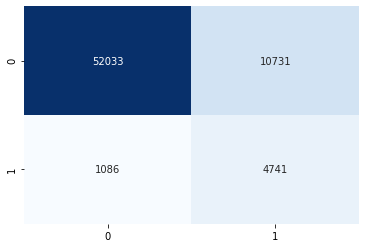

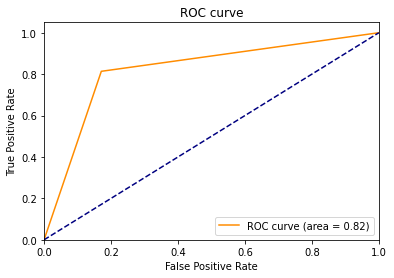

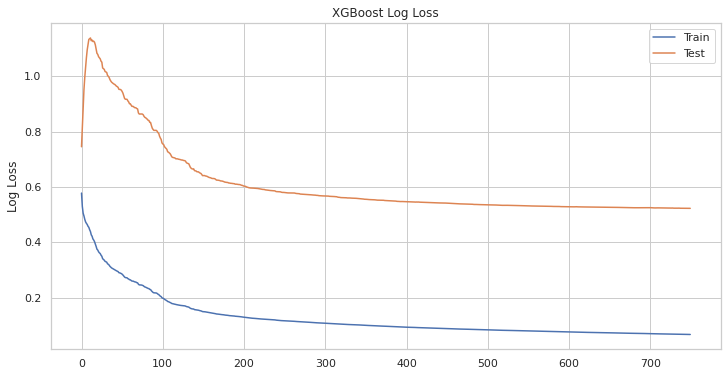

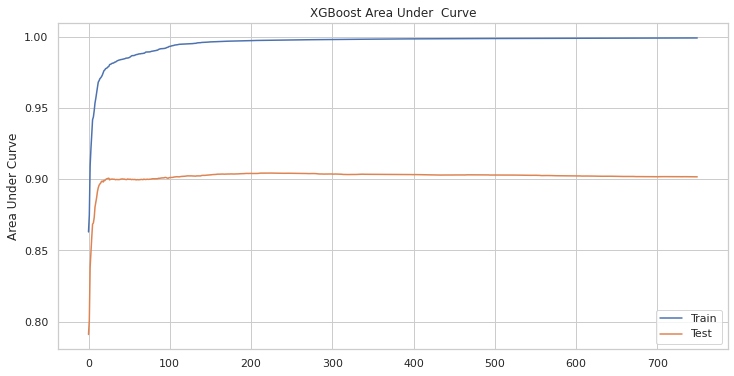

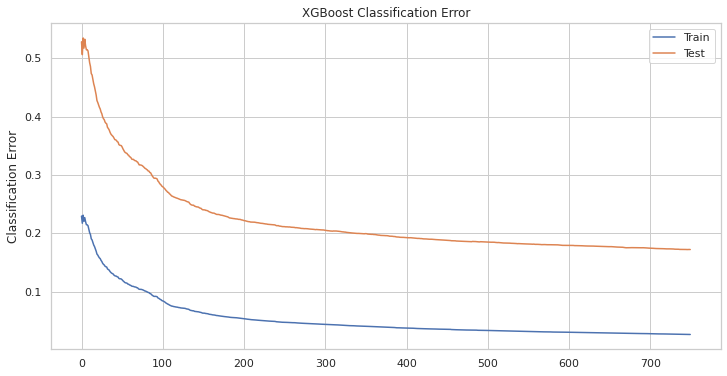

In [7]:
y_pred = XGBC.predict(X_test)
# evaluate predictions
recall_test = recall_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
auc_test = roc_auc_score(y_test, y_pred)

print("Recall: %.2f%%" % (recall_test * 100.0))
print("Precision: %.2f" % (precision_test * 100.0))
print("AUC Score: %.2f" % (auc_test))
print('Classification report: \n' + classification_report(y_test, y_pred))

cfm = confusion_matrix(y_test,y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

sns.set(style="whitegrid")
sns.set_color_codes("muted")
results = XGBC.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('Area Under Curve')
plt.title('XGBoost Area Under  Curve')
plt.show()
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [8]:
summary = pd.DataFrame(np.array([ [79.51, 33.40, 0.82], [81.36, 30.64, 0.82]]), 
                       index=['XGB Classifier', 'XGB Classifier with RFE'],
                       columns=['Recall', 'Precision', 'AUC Score'])

summary

,Recall,Precision,AUC Score
XGB Classifier,79.51,33.40,0.82
XGB Classifier with RFE,81.36,30.64,0.82


Looking at the metrics if a more simple model is needed and precision isn't an issue, this sub selection of features presents very good results.

## Final remarks

First of all, it needs to be stated that during the construction of this model quite a few assumptions were made by this user, which could result in a personal bias. So, everything would need to be compared against a baseline where no assumptions are made (i.e. using all features as is) to check if any personal bias was made during the process.

However with the current setting, it seems that a couple of factors weight more than others to predict the income of a person, as seen for education and occupation. Not only that but being a man or black seems to have an higher impact than other genders (female) or races. This could be validated through statistical testing in order to prove society inequalities or show what degree of education or occupations would likely result in better incomes.

Furthermore, as proven by the recursive feature elimination quite a few features aren't bringing added value to the overall scenario. So, future income studies could focus on segregating the ones that bring more value, in order to improve data quality.

As well as, it is clear that there is a racial imbalance (yet it is not known if it is an actual representation of the population). Anyway, pondering about the study purpose in such an imbalanced scenario might be a good way to achieve more representative results.

Finally, on the technical side quite a lot can be tested such as:

* Using only the continuous variables to model,
* Using only the highest correlated features,
* Augment the data according to race,
* Use other augmenting techniques, like SMOTE-NC which is a better fit for binary variables, or even more advancing tools like the open source [tool](https://github.com/ydataai/ydata-synthetic) from ydata which uses Generative Adversarial Networks for synthetic data generation,
* Hyparameter model tuning.
* Explore other algorithms like migrating to a neural network scenario.
